<a href="https://colab.research.google.com/github/Coursera-Capstone1/Coursera-Capstone1/blob/main/DSN_Class_6_In_Class_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Be the hero of the day by predicting the survival of Titanic passengers

Competition Description

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. 

**In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.**
GoodLuck!!!

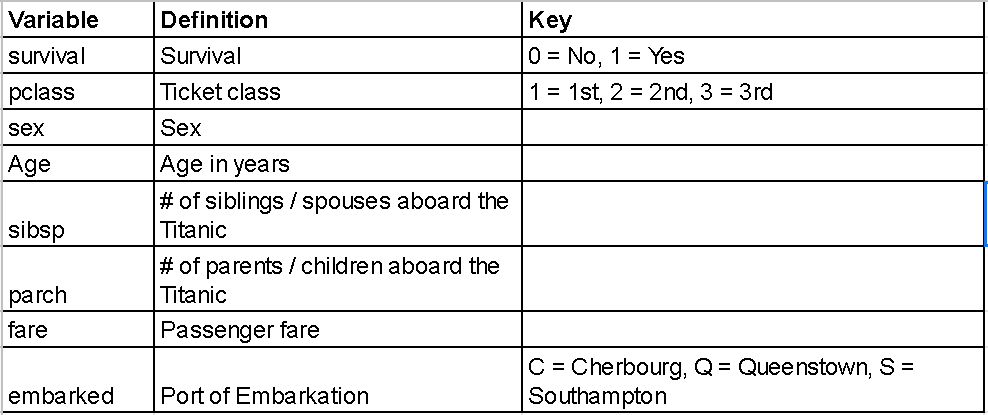

#### Previous notebooks used in this class can be accessed below:

1. [Linear Regression](https://colab.research.google.com/drive/1FFhkwU6gplsnlhoqkCzkkSD5fF3nsFc0?usp=sharing)
2. [Classification](https://bit.ly/AIECOLAB2) 

### More Resources:
1. Exploratory Data Analysis, Feature Engineering and Modelling using Supermarket Sales Data.
Part 1. By Rising Odegua https://towardsdatascience.com/exploratory-data-analysis-featureengineering-and-modelling-using-supermarket-sales-data-part-1-228140f89298
2. A Practical Guide to Feature Engineering in Python By Rising Odegua https://heartbeat.fritz.ai/apractical-guide-to-feature-engineering-in-python-8326e40747c8
3. train_test_split Vs StratifiedShuffleSplit - Brain John By Brain John
https://medium.com/@411.codebrain/train-test-split-vs-stratifiedshufflesplit-374c3dbdcc36
4. Introduction to Exploratory Data Analysis (EDA) - Code Heroku https://medium.com/codeheroku/introduction-to-exploratory-data-analysis-eda-c0257f888676
5. Data Preprocessing for Machine Learning - Data-Driven Investor
https://medium.com/datadriveninvestor/data-preprocessing-for-machine-learning-188e9eef1d2c
6. Processing Data To Improve Machine Learning Models Accuracy
https://medium.com/fintechexplained/processing-data-to-improve-machine-learning-modelsaccuracy-de17c655dc8e
7. How To Develop a Machine Learning Model From Scratch
https://towardsdatascience.com/machine-learning-general-process-8f1b510bd8af
8. All Machine Learning Models Explained in 6 Minutes
https://towardsdatascience.com/all-machine-learning-models-explained-in-6-minutes-9fe30ff6776a
9. 7 Ways to Improve your Predictive Models - Rants on Machine Learning
https://medium.com/rants-on-machine-learning/7-ways-to-improve-your-predictive-models-753705eba3d6
10. 3 ways to improve your Machine Learning results without more data https://towardsdatascience.com/3-ways-to-improve-your-machine-learning-results-without-more-data-f2f0fe78976e

In [1]:
# For running pandas_profiling
! pip install pandas==0.25.3
! pip install numpy==1.16.5
!pip install matplotlib-venn
!apt-get -qq install -y libfluidsynth1
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
!apt-get -qq install -y graphviz && pip install pydot
!pip install cartopy
import pydot
import cartopy
import libarchive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas_profiling import ProfileReport

     |████████████████████████████████| 10.4 MB 5.3 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 0.25.3 which is incompatible.
fbprophet 0.7.1 requires pandas>=1.0.4, but you have pandas 0.25.3 which is incompatible.
     |████████████████████████████████| 17.3 MB 229 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This 

Selecting previously unselected package libfluidsynth1:amd64.
(Reading database ... 156210 files and directories currently installed.)
Preparing to unpack .../libfluidsynth1_1.1.9-1_amd64.deb ...
Unpacking libfluidsynth1:amd64 (1.1.9-1) ...
Setting up libfluidsynth1:amd64 (1.1.9-1) ...
Processing triggers for libc-bin (2.27-3ubuntu1.3) ...
/sbin/ldconfig.real: /usr/local/lib/python3.7/dist-packages/ideep4py/lib/libmkldnn.so.0 is not a symbolic link

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 156215 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.2.2-3.1ubuntu0.7_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Setting up libarchive-dev:amd64 (3.2.2-3.1ubuntu0.7) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 154 kB 7.2 MB/s 
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31646 sha256=c665714badc771b1059ff3

In [2]:
import pandas as pd
titanic = pd.read_csv('/content/inclass_titanic.csv')
titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [4]:
from sklearn import metrics # Module For evaluation metrics
from sklearn.model_selection import train_test_split # Module for splitting the data

In [5]:
X = titanic.drop(["Survived"], axis= "columns") # droping the label variable (Purchased) from the data
y = titanic["Survived"]

In [6]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [7]:
pd.get_dummies([ "Survived"])

,Survived
0,1


In [8]:
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass        891 non-null int64
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_female    891 non-null uint8
Sex_male      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(3), uint8(5)
memory usage: 39.3 KB


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state= 42)

In [11]:
from sklearn.linear_model import LogisticRegression

logisticmodel = LogisticRegression()
logisticmodel.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [12]:
logistic_prediction = logisticmodel.predict(X_test)

In [13]:
metrics.accuracy_score(y_test, logistic_prediction)

0.8097014925373134

In [16]:
def ConfusionMatrix (ytest, ypred, label = ['Negative', 'Positive']):
  import matplotlib.pyplot as plt
  from sklearn.metrics import confusion_matrix
  import seaborn as sns
  cm = confusion_matrix(ytest, ypred)
  plt.figure(figsize=(7, 5))
  sns.heatmap(cm, annot = True, cbar = False, fmt = 'd', cmap = 'winter')
  plt.xlabel('Predicted', fontsize = 13)
  plt.xticks ( [0.5, 1.5], label)
  plt.yticks ( [0.5, 1.5], label)
  plt.ylabel('Truth', fontsize = 13)
  plt.title('A confusion matrix');

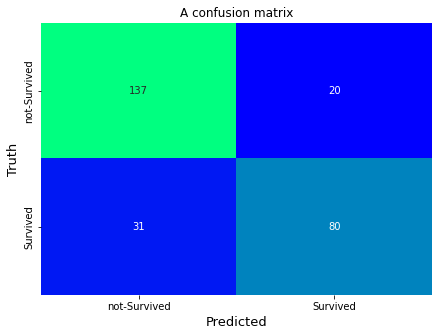

In [18]:
ConfusionMatrix(y_test, logistic_prediction, label= ["not-Survived", "Survived"])

In [19]:
metrics.accuracy_score(y_test, logistic_prediction)

0.8097014925373134

In [20]:
print(metrics.classification_report(y_test, logistic_prediction))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       157
           1       0.80      0.72      0.76       111

    accuracy                           0.81       268
   macro avg       0.81      0.80      0.80       268
weighted avg       0.81      0.81      0.81       268



In [21]:
from sklearn.metrics import f1_score


In [22]:
print(f1_score(y_test,logistic_prediction))

0.7582938388625592


In [23]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [24]:
RandomForestClassifier()

RandomForestClassifier()

In [25]:
rf_prediction = randomforestmodel.predict(X_test)

In [26]:
metrics.accuracy_score(y_test, rf_prediction)

0.7947761194029851

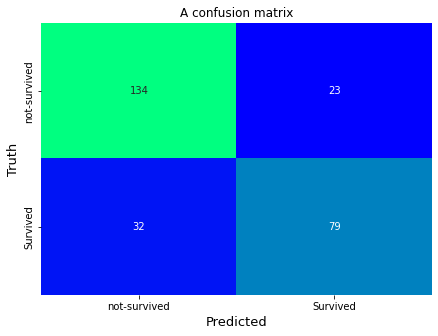

In [27]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-survived", "Survived"])

In [28]:
metrics.accuracy_score(y_test, rf_prediction)

0.7947761194029851

In [29]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       157
           1       0.77      0.71      0.74       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.79       268
weighted avg       0.79      0.79      0.79       268



# Can we make this model better by tuning Hyper Parameters?

In [30]:
from sklearn.ensemble import RandomForestClassifier
randomforestmodel = RandomForestClassifier(n_estimators= 15)
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15)

In [31]:
rf_prediction = randomforestmodel.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, rf_prediction)

0.7723880597014925

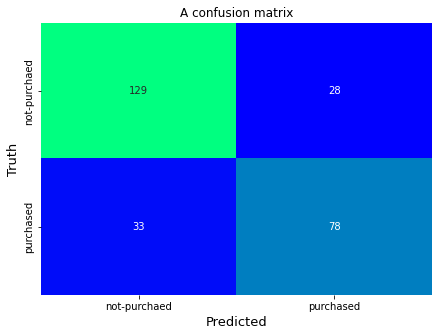

In [33]:
ConfusionMatrix(y_test, rf_prediction, label= ["not-purchaed", "purchased"])

In [34]:
metrics.accuracy_score(y_test, rf_prediction)


0.7723880597014925

In [35]:
from sklearn.metrics import f1_score
print(f1_score(y_test, rf_prediction))

0.7188940092165897


In [36]:
print(metrics.classification_report(y_test, rf_prediction))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.74      0.70      0.72       111

    accuracy                           0.77       268
   macro avg       0.77      0.76      0.76       268
weighted avg       0.77      0.77      0.77       268



In [37]:
print('Parameters currently in use:\n')
mod_details = randomforestmodel.get_params()
for i in mod_details:
  print(i," :", mod_details[i])

Parameters currently in use:

bootstrap  : True
ccp_alpha  : 0.0
class_weight  : None
criterion  : gini
max_depth  : None
max_features  : auto
max_leaf_nodes  : None
max_samples  : None
min_impurity_decrease  : 0.0
min_samples_leaf  : 1
min_samples_split  : 2
min_weight_fraction_leaf  : 0.0
n_estimators  : 15
n_jobs  : None
oob_score  : False
random_state  : None
verbose  : 0
warm_start  : False


In [39]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 250, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 50, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

for i in random_grid:
  print(i," :", random_grid[i])

n_estimators  : [20, 45, 71, 96, 122, 147, 173, 198, 224, 250]
max_features  : ['auto', 'sqrt']
max_depth  : [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None]
min_samples_split  : [2, 5, 10]
min_samples_leaf  : [1, 2, 4]
bootstrap  : [True, False]


In [40]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 150, cv = 3, verbose=2, random_state=7, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 10, 15, 20, 25, 30, 35,
                                                      40, 45, 50, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 45, 71, 96, 122,
                                                         147, 173, 198, 224,
                                                         250]},
                   random_state=7, verbose=2)

In [41]:
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 40,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 122}

In [42]:
from sklearn.metrics import accuracy_score

base_model = RandomForestClassifier(random_state= 7)
base_model.fit(X_train, y_train)
bm_predictions = base_model.predict(X_test)
base_accuracy = metrics.accuracy_score(y_test, bm_predictions)
print("Base model Accuracy:", base_accuracy)

best_random = rf_random.best_estimator_
best_random.fit(X_train, y_train)
best_predictions = best_random.predict(X_test)
best_accuracy = metrics.accuracy_score(y_test, best_predictions)
print("Best model Accuracy:", base_accuracy)

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base model Accuracy: 0.7910447761194029
Best model Accuracy: 0.7910447761194029
Improvement of -0.94%.
